In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

In [2]:
HIV = pd.read_csv("HIV.csv")
HS = pd.read_csv("health_services.csv")
LE = pd.read_csv("Life_expectancy.csv")
len(HIV)

158

In [3]:
158*4

632

## HIV Data Cleanup

In [4]:
HIV.head()

Country          HIV2013          HIV2009          HIV2005  \
0  Afghanistan  <0.1 [<0.1-0.1]  <0.1 [<0.1-0.1]  <0.1 [<0.1-0.1]   
1      Albania  <0.1 [<0.1-0.1]  <0.1 [<0.1-0.1]  <0.1 [<0.1-0.1]   
2      Algeria    0.1 [0.1-0.2]   0.1 [<0.1-0.2]   0.1 [<0.1-0.2]   
3       Angola    2.4 [1.7-3.2]    2.1 [1.4-2.9]    1.9 [1.3-2.6]   
4    Argentina          No data          No data          No data   

           HIV2001  
0  <0.1 [<0.1-0.1]  
1  <0.1 [<0.1-0.1]  
2   0.1 [<0.1-0.2]  
3    1.8 [1.2-2.4]  
4          No data

In [5]:
variables = list(HIV.columns.values)
for item in variables[1:]: 
    HIV[item] = HIV[item].map(lambda x: x.lstrip('<'))
    HIV[item] = HIV[item].map(lambda x: x[0:3])
HIV = HIV.replace("No ", np.nan)
HIV.head()

Country HIV2013 HIV2009 HIV2005 HIV2001
0  Afghanistan     0.1     0.1     0.1     0.1
1      Albania     0.1     0.1     0.1     0.1
2      Algeria     0.1     0.1     0.1     0.1
3       Angola     2.4     2.1     1.9     1.8
4    Argentina     NaN     NaN     NaN     NaN

In [73]:
HIV.HIV2013 = pd.to_numeric(HIV.HIV2013)
HIV.HIV2009 = pd.to_numeric(HIV.HIV2009)
HIV.HIV2005 = pd.to_numeric(HIV.HIV2005)
HIV.HIV2001 = pd.to_numeric(HIV.HIV2001)

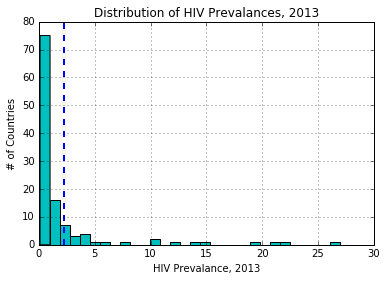

In [81]:
HIV.HIV2013.hist(bins = 30, color = 'c')
pyplot.xlabel("HIV Prevalance, 2013")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of HIV Prevalances, 2013")
pyplot.axvline(HIV.HIV2013.mean(), color='b', linestyle='dashed', linewidth=2)

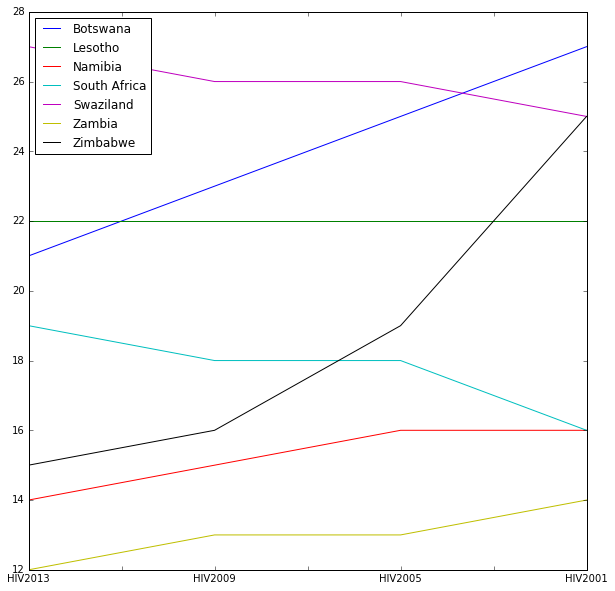

In [147]:
highHIV = HIV[HIV.HIV2013>10]
highHIV.ix[:,[0,1]]
highHIV_flipped = highHIV.T
temp = highHIV_flipped.drop(highHIV_flipped.index[[0,5]])
temp.columns = ["Botswana", "Lesotho", "Namibia", "South Africa", "Swaziland", "Zambia", "Zimbabwe"]
temp.plot(figsize = (10, 10))
#change column order

In [74]:
HIV["Increase"] = HIV["HIV2013"] - HIV["HIV2001"]

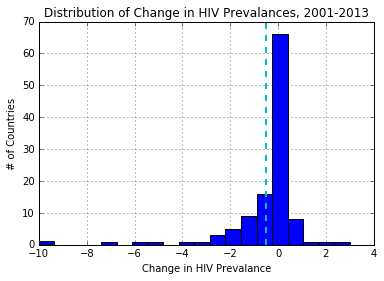

In [77]:
HIV.Increase.hist(bins = 20)
pyplot.xlabel("Change in HIV Prevalance")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of Change in HIV Prevalances, 2001-2013")
pyplot.axvline(HIV.Increase.mean(), color='c', linestyle='dashed', linewidth=2)

In [6]:
'''HIV2013 = HIV.ix[:,0:2]
HIV2009 = HIV.ix[:,[0,2]]
HIV2005 = HIV.ix[:,[0,3]]
HIV2001 = HIV.ix[:,[0,4]]
HIV2001.head()'''

Country HIV2001
0  Afghanistan     0.1
1      Albania     0.1
2      Algeria     0.1
3       Angola     1.8
4    Argentina     NaN

## Health Services Data Clean UP

In [7]:
HS.head()

Country  \
0  Afghanistan   
1      Albania   
2      Algeria   
3      Andorra   
4       Angola   

   Total expenditure on health as a percentage of gross domestic product; 2013  \
0                                                8.1                             
1                                                5.9                             
2                                                6.6                             
3                                                8.1                             
4                                                3.8                             

   Total expenditure on health as a percentage of gross domestic product; 2012  \
0                                                8.5                             
1                                                5.6                             
2                                                6.0                             
3                                                8.3                             
4                                                3.5                             

   Total expenditure on health as a percentage of gross domestic product; 2000  \
0                                                NaN                             
1                                                6.3                             
2                                                3.5                             
3                                                6.0                             
4                                                3.4                             

   General government expenditure on health as a percentage of total expenditure on health; 2013  \
0                                               21.2                                               
1                                               48.4                                               
2                                               74.2                                               
3                                               75.3                                               
4                                               66.7                                               

   General government expenditure on health as a percentage of total expenditure on health; 2012  \
0                                               20.8                                               
1                                               49.3                                               
2                                               73.5                                               
3                                               76.6                                               
4                                               62.2                                               

   General government expenditure on health as a percentage of total expenditure on health; 2000  \
0                                                NaN                                               
1                                               36.1                                               
2                                               73.3                                               
3                                               64.8                                               
4                                               49.5                                               

   Private expenditure on health as a percentage of total expenditure on health; 2013  \
0                                               78.8                                    
1                                               51.6                                    
2                                               25.8                                    
3                                               24.7                                    
4                                               33.3                                    

   Private expenditure on health as a percentage of total expenditure on health; 

In [8]:
list(HS.columns.values)

['Country',
 'Total expenditure on health as a percentage of gross domestic product; 2013',
 'Total expenditure on health as a percentage of gross domestic product; 2012',
 'Total expenditure on health as a percentage of gross domestic product; 2000',
 'General government expenditure on health as a percentage of total expenditure on health; 2013',
 'General government expenditure on health as a percentage of total expenditure on health; 2012',
 'General government expenditure on health as a percentage of total expenditure on health; 2000',
 'Private expenditure on health as a percentage of total expenditure on health; 2013',
 'Private expenditure on health as a percentage of total expenditure on health; 2012',
 'Private expenditure on health as a percentage of total expenditure on health; 2000',
 'General government expenditure on health as a percentage of total government expenditure; 2013',
 'General government expenditure on health as a percentage of total government expenditure; 20

In [9]:
#drop columns that we don't want
to_drop = list(range(10,22))+ list(range(25,28))
HS = HS.drop(HS.columns[to_drop], axis=1)
list(HS.columns.values)

['Country',
 'Total expenditure on health as a percentage of gross domestic product; 2013',
 'Total expenditure on health as a percentage of gross domestic product; 2012',
 'Total expenditure on health as a percentage of gross domestic product; 2000',
 'General government expenditure on health as a percentage of total expenditure on health; 2013',
 'General government expenditure on health as a percentage of total expenditure on health; 2012',
 'General government expenditure on health as a percentage of total expenditure on health; 2000',
 'Private expenditure on health as a percentage of total expenditure on health; 2013',
 'Private expenditure on health as a percentage of total expenditure on health; 2012',
 'Private expenditure on health as a percentage of total expenditure on health; 2000',
 'Out-of-pocket expenditure as a percentage of total expenditure on health; 2013',
 'Out-of-pocket expenditure as a percentage of total expenditure on health; 2012',
 'Out-of-pocket expenditure

In [30]:
HS.columns = ["Country", "Total_pct_GDP2013", "Total_pct_GDP2012", "Total_pct_GDP2000", "Govt_pct_total2013", "Govt_pct_total2012", "Govt_pct_total2000", "Pvt_pct_total2013", "Pvt_pct_total2012", "Pvt_pct_total2000", "Pocket_pct_total2013", "Pocket_pct_total2012", "Pocket_pct_total2000"]

In [31]:
HS.head()

Country  Total_pct_GDP2013  Total_pct_GDP2012  Total_pct_GDP2000  \
0  Afghanistan                8.1                8.5                NaN   
1      Albania                5.9                5.6                6.3   
2      Algeria                6.6                6.0                3.5   
3      Andorra                8.1                8.3                6.0   
4       Angola                3.8                3.5                3.4   

   Govt_pct_total2013  Govt_pct_total2012  Govt_pct_total2000  \
0                21.2                20.8                 NaN   
1                48.4                49.3                36.1   
2                74.2                73.5                73.3   
3                75.3                76.6                64.8   
4                66.7                62.2                49.5   

   Pvt_pct_total2013  Pvt_pct_total2012  Pvt_pct_total2000  \
0               78.8               75.3                NaN   
1               51.6               50.7               63.9   
2               25.8               26.5               26.7   
3               24.7               23.4               35.2   
4               33.3               37.8               50.5   

   Pocket_pct_total2013  Pocket_pct_total2012  Pocket_pct_total2000  
0                  73.8                  70.5                   NaN  
1                  51.5                  50.5                  63.8  
2                  25.1                  25.8                  25.8  
3                  18.4                  17.5                  26.6  
4                  24.4                  26.7                  36.1

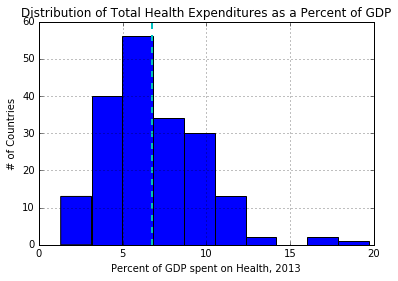

In [59]:
HS.Total_pct_GDP2013.hist()
pyplot.xlabel("Percent of GDP spent on Health, 2013")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of Total Health Expenditures as a Percent of GDP")
pyplot.axvline(HS["Total_pct_GDP2013"].mean(), color='c', linestyle='dashed', linewidth=2)

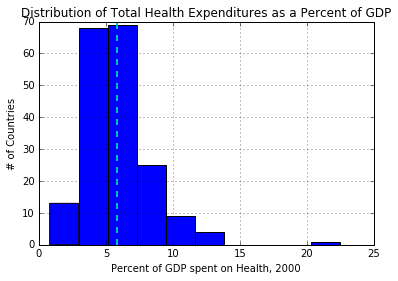

In [60]:
HS.Total_pct_GDP2000.hist()
pyplot.xlabel("Percent of GDP spent on Health, 2000")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of Total Health Expenditures as a Percent of GDP")
pyplot.axvline(HS["Total_pct_GDP2000"].mean(), color='c', linestyle='dashed', linewidth=2)

In [39]:
HS["Total_pct_GDPIncrease"] = HS["Total_pct_GDP2013"] - HS["Total_pct_GDP2000"]

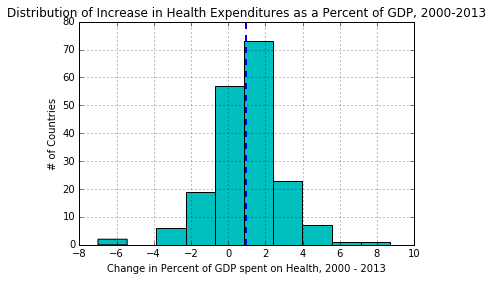

In [58]:
HS["Total_pct_GDPIncrease"].hist(color = 'c')
pyplot.xlabel("Change in Percent of GDP spent on Health, 2000 - 2013")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of Increase in Health Expenditures as a Percent of GDP, 2000-2013")
pyplot.axvline(HS["Total_pct_GDPIncrease"].mean(), color='b', linestyle='dashed', linewidth=2)

In [10]:
'''HS2013 = HS.ix[:,[0,1,4,7,10]]
HS2012 = HS.ix[:,[0,2,5,8,11]]
HS2000 = HS.ix[:,[0,3,6,9,12]]'''

## Merging data sets (outer join to keep cases for now)

In [12]:
list(HIV2013.columns.values)
HS_HIV_2013 = pd.merge(HS2013, HIV2013, on = "Country", how = "outer")
HS_HIV_2000_2001 = pd.merge(HS2000, HIV2001, on = "Country", how = "outer")

In [13]:
LE.head()

Country  Year   LE B Both sexes   LE BFemale   LE B Male  \
0  Afghanistan  2013                61           62          61   
1  Afghanistan  2012                60           61          58   
2  Afghanistan  2000                55           56          54   
3  Afghanistan  1990                49           50          49   
4      Albania  2013                74           76          73   

    LE 60 Both sexes  LE 60 Female   LE 60 Male HALE Both sexes HALE  Female  \
0                 16            17           15              50           50   
1                 16            17           15              49           49   
2                 15            16           14              45           45   
3                 14            15           13             NaN          NaN   
4                 19            20           18              65           66   

  HALE  Male  
0         50  
1         49  
2         45  
3        NaN  
4         64